# Projeto 02 - Previsão de Renda

## Etapa 1 CRISP - DM: Entendimento do negócio

Como primeira etapa do processo de desenvolvimento de um modelo de previsão de renda, é essencial compreender o contexto do negócio e estabelecer os objetivos do projeto.

Neste caso, estamos lidando com dados de indivíduos e nosso objetivo é construir um modelo preditivo que estime a renda anual de uma pessoa. Queremos desenvolver um modelo que ajude o próprio indivíduo a tomar decisões financeiras, fornecendo uma previsão confiável de sua renda.

Para isso, é crucial entender a situação financeira dos clientes, a relevância dessa previsão de renda para eles, quais são os problemas enfrentados e todos os detalhes do processo que influenciam a geração de renda e, consequentemente, os dados disponíveis.

Além disso, nesta etapa inicial, é fundamental elaborar um planejamento detalhado do projeto, definindo as atividades a serem realizadas e estabelecendo uma estratégia clara para alcançar os objetivos definidos.

## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa é o entendimento dos dados. Foram fornecidas 14 variáveis. O significado de cada uma dessas variáveis se encontra na tabela.

#### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|


#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [119]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [49]:
df = pd.read_csv('previsao_de_renda.csv')
df = df.drop(columns=['mau', 'Unnamed: 0'])
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [3]:
prof = ProfileReport(df, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
prof.to_file('./renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas

Entender a alteração da renda indicada pela variável resposta e as variáveis explicativas (demais).


In [45]:
df_numericos = df.select_dtypes(include=['float64', 'int64'])

In [46]:
correlacoes = df_numericos.corr()['renda'].sort_values(ascending=False)

In [47]:
correlacoes

renda                    1.000000
tempo_emprego            0.378387
idade                    0.042570
qt_pessoas_residencia    0.020977
qtd_filhos               0.009567
index                   -0.001740
Name: renda, dtype: float64

Analisando a análise bivariada acima, podemos verificar que:
- a coluna "tempo_emprego" tem uma correlação positiva moderada (0.394) com a coluna "Renda", o que sugere que quanto maior o tempo de emprego, maior a renda. 
- A coluna "idade" tem uma correlação positiva muito fraca (0.043) com a coluna "Renda". Isso indica que há uma leve tendência de que pessoas mais velhas possuam uma renda ligeiramente maior.
- As colunas "qt_pessoas_residencia" e "qtd_filhos" têm correlações positivas muito fracas (0.021 e 0.010, respectivamente) com a coluna "Renda". Isso sugere uma relação muito leve entre esses fatores e a renda.

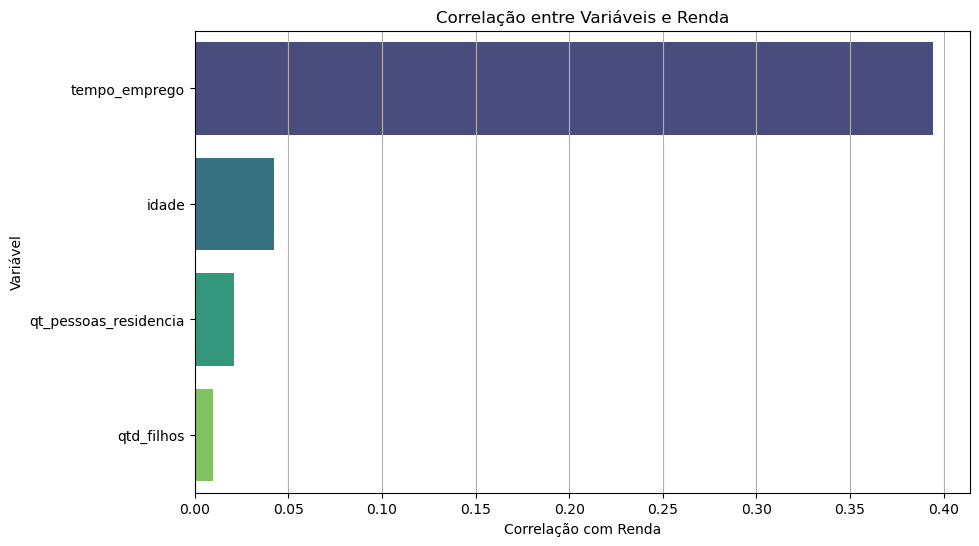

In [48]:
# Definir as variáveis e suas correlações
variaveis = ['tempo_emprego', 'idade', 'qt_pessoas_residencia', 'qtd_filhos']
correlacoes = [0.394235, 0.042570, 0.020977, 0.009567]

# Criar o gráfico de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=correlacoes, y=variaveis, orient='h', palette='viridis')
plt.xlabel('Correlação com Renda')
plt.ylabel('Variável')
plt.title('Correlação entre Variáveis e Renda')
plt.grid(axis='x')
plt.show()

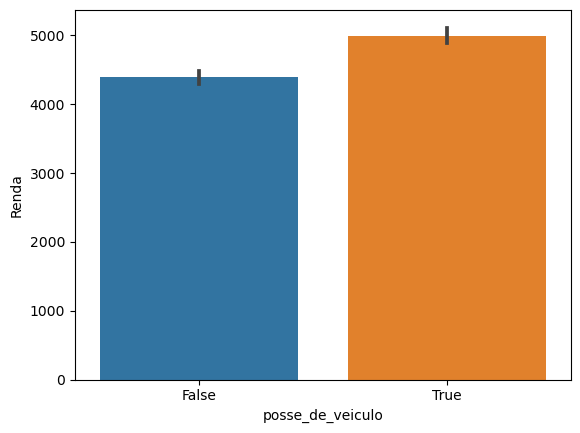

In [35]:
sns.barplot(x='posse_de_veiculo', y='renda', data=df)
plt.ylabel('Renda')
plt.show()

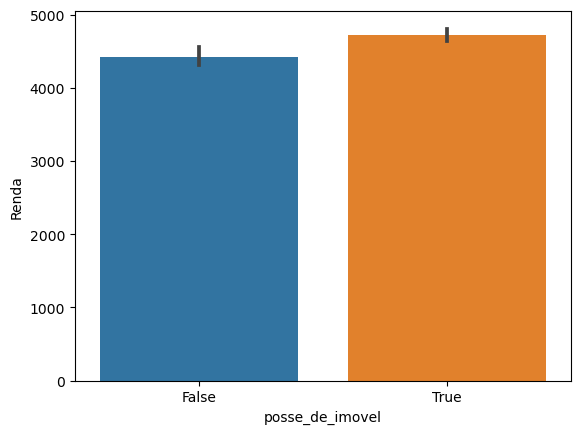

In [27]:
sns.barplot(x='posse_de_imovel', y='renda', data=df)
plt.ylabel('Renda')
plt.show()

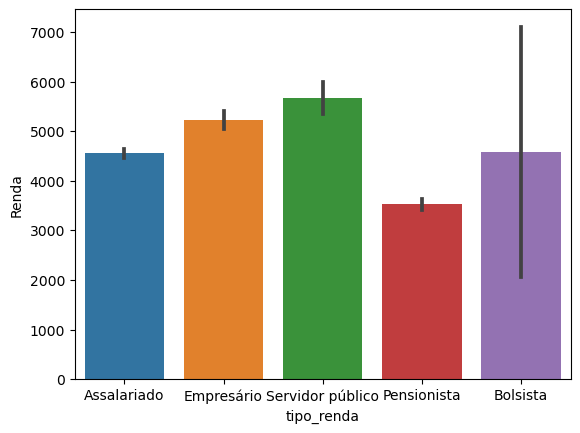

In [26]:
sns.barplot(x='tipo_renda', y='renda', data=df)
plt.ylabel('Renda')
plt.show()

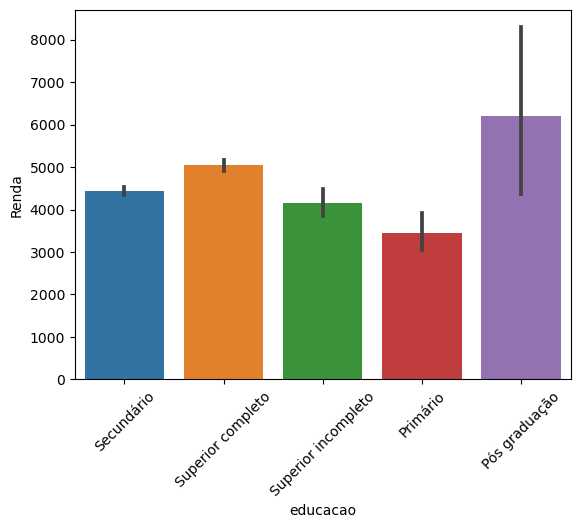

In [30]:
sns.barplot(x='educacao', y='renda', data=df)
plt.ylabel('Renda')
plt.xticks(rotation=45)
plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:
- seleção:
Neste caso, os dados já estão pré-selecionados
- limpeza:
Precisaremos identificar e tratar dados faltantes
- construção:
Não faremos construção de novas variáveis
- integração:
Temos apenas uma fonte de dados, não é necessário agregação
- formatação:
Os dados já se encontram em formatos úteis

Os dados já estão pré-selecionados, construídos e integrados, mas há dados faltantes que serão preenchidos com a média

In [43]:
missing_values = df.isnull().sum()
missing_values

data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [69]:
media_tempo_emprego = df['tempo_emprego'].mean()

df['tempo_emprego'].fillna(media_tempo_emprego, inplace=True)

print(df.isnull().sum())

data_ref                 0
index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem:
Utilizaremos a técnica de floresta aleatória (**random forest**), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como estas. 
- Desenho do teste:
Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada ```treinamento```, onde o algoritmo 'aprende', e outra chamada ```teste```, onde o algoritmo é avaliado.
#### Dividindo a base em treino e teste



In [72]:
# Separando as features (X) e o target (y)
X = df
X = df.drop(columns=['index', 'data_ref', 'sexo', 'renda', 'estado_civil', 'tipo_residencia'])
y = df['renda']

X.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,idade,tempo_emprego,qt_pessoas_residencia
0,False,True,1,Assalariado,Secundário,36,3.575342,3.0
1,True,True,0,Empresário,Secundário,42,0.860274,2.0
2,True,True,2,Assalariado,Superior completo,31,8.065753,4.0
3,True,False,0,Empresário,Secundário,50,1.208219,2.0
4,False,False,0,Assalariado,Secundário,52,13.873973,2.0


In [74]:
X = pd.get_dummies(X, columns=['posse_de_veiculo', 'posse_de_imovel', 'educacao', 'tipo_renda'], drop_first=True).copy()
X.dtypes

qtd_filhos                        int64
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
posse_de_veiculo_True              bool
posse_de_imovel_True               bool
educacao_Pós graduação             bool
educacao_Secundário                bool
educacao_Superior completo         bool
educacao_Superior incompleto       bool
tipo_renda_Bolsista                bool
tipo_renda_Empresário              bool
tipo_renda_Pensionista             bool
tipo_renda_Servidor público        bool
dtype: object

In [76]:
# Dividindo os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando o tamanho dos conjuntos
print("Tamanho do conjunto de treinamento:", len(X_train))
print("Tamanho do conjunto de teste:", len(X_test))

Tamanho do conjunto de treinamento: 12000
Tamanho do conjunto de teste: 3000


### Rodando o modelo


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [113]:
reg1 = DecisionTreeRegressor(max_depth=33)
reg1.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=33)

In [114]:
mse1 = reg1.score(X_test, y_test)

print("O R-quadrado da árvore com profundidade", reg1.get_depth(), "é", mse1)

O R-quadrado da árvore com profundidade 33 é 0.8227713503791193


## Etapa 5 Crisp-DM: Avaliação dos resultados

Um R-quadrado de aproximadamente 0,82 indica que o modelo de árvore de decisão com profundidade 33 explica cerca de 82% da variabilidade dos dados de renda nos dados de teste. Isso sugere que o modelo é capaz de capturar uma quantidade significativa da complexidade dos dados e tem um bom desempenho preditivo.

Com base nesse resultado, podemos concluir que o modelo de árvore de decisão com profundidade 33 é bastante promissor para prever os valores de renda. 


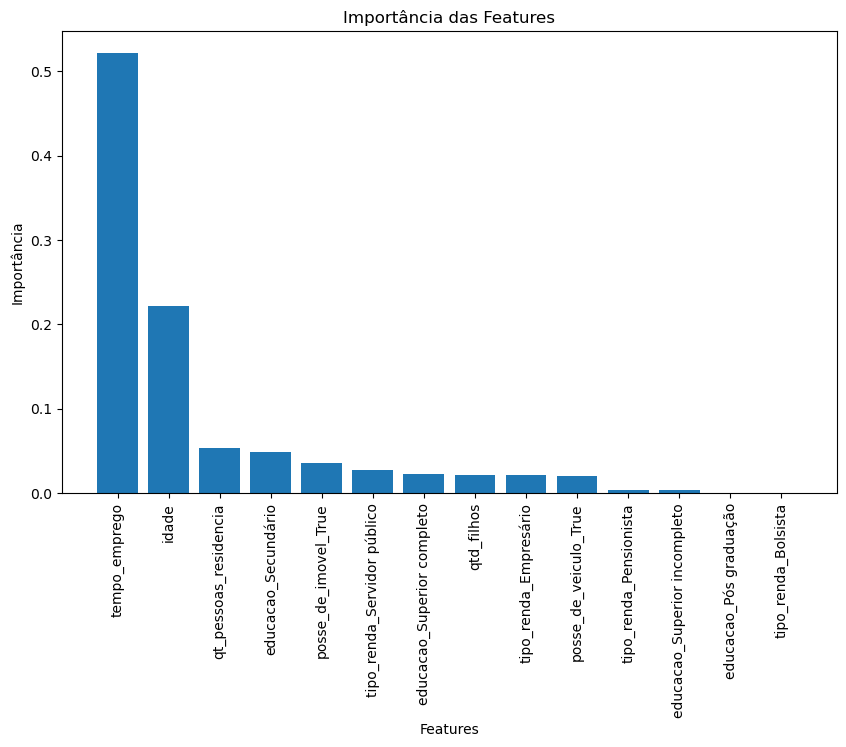

In [118]:
# Obtendo a importância das features
importances = reg1.feature_importances_

# Obtendo os nomes das features
feature_names = X.columns

# Ordenando as importâncias das features
indices = np.argsort(importances)[::-1]

# Plotando as importâncias das features em um gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importância")
plt.title("Importância das Features")
plt.show()

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando em um motor de análise que fará a previsão da renda.